In [147]:
from pyforest import *

import warnings
warnings.filterwarnings('ignore')

In [118]:
melb_data = pd.read_csv('Melbourne_housing_FULL.csv')

### EDA

In [119]:
melb_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [120]:
melb_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [121]:
melb_data.shape

(34857, 21)

In [122]:
melb_data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

### Data Cleaning

In [123]:
# Handle Missing Values
melb_data.Price.describe()

count    2.724700e+04
mean     1.050173e+06
std      6.414671e+05
min      8.500000e+04
25%      6.350000e+05
50%      8.700000e+05
75%      1.295000e+06
max      1.120000e+07
Name: Price, dtype: float64

In [124]:
melb_data.Distance.describe()

count    34856.000000
mean        11.184929
std          6.788892
min          0.000000
25%          6.400000
50%         10.300000
75%         14.000000
max         48.100000
Name: Distance, dtype: float64

In [125]:
melb_data.Postcode.describe()

count    34856.000000
mean      3116.062859
std        109.023903
min       3000.000000
25%       3051.000000
50%       3103.000000
75%       3156.000000
max       3978.000000
Name: Postcode, dtype: float64

In [126]:
melb_data.shape[0] * .7

24399.899999999998

In [127]:
melb_data.dropna(thresh=int(melb_data.shape[0] * .7), axis= 1, inplace=True)

In [128]:
melb_data.Regionname.mode()

0    Southern Metropolitan
dtype: object

In [129]:
melb_data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price            7610
Method              0
SellerG             0
Date                0
Distance            1
Postcode            1
Bedroom2         8217
Bathroom         8226
Car              8728
CouncilArea         3
Lattitude        7976
Longtitude       7976
Regionname          3
Propertycount       3
dtype: int64

In [130]:
def handle_missing_values(data):
    
    data['Price'] = data.Price.fillna(data.Price.median())
    
    data['Distance'] = data.Price.interpolate()
    
    data['Postcode'] = data.Postcode.fillna(data.Postcode.mean())
    
    data['Bedroom2'] = data.Bedroom2.fillna(data.Bedroom2.median())
    
    data['Bathroom'] = data.Bathroom.fillna(data.Bathroom.median())

    data['Car'] = data.Car.fillna(method='ffill')
    
    data['CouncilArea'] = data.CouncilArea.fillna(data.CouncilArea.mode()[0])
    
    data['Lattitude'] = data.Lattitude.fillna(method='bfill')
    
    data['Longtitude'] = data.Longtitude.fillna(method='bfill')
    
    data['Regionname'] = data.Regionname.fillna(data.Regionname.mode()[0])
    
    data['Propertycount'] = data.Propertycount.interpolate()
    
    return data

In [131]:
melb_data = handle_missing_values(melb_data)

In [132]:
melb_data.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [137]:
def handle_outliers(data):
    pass

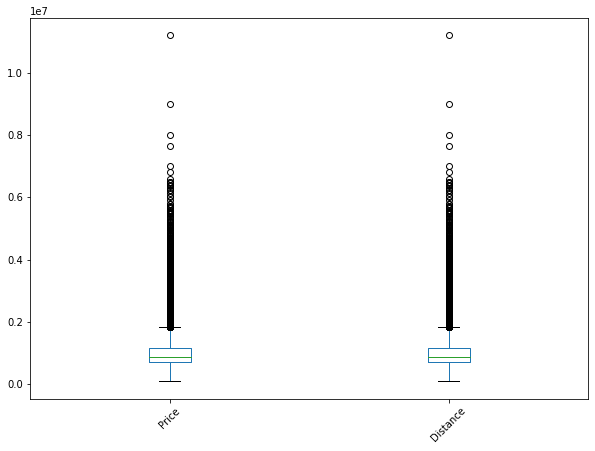

In [136]:
melb_data.boxplot(rot=45, grid=False, figsize=(10,7), column=['Price', 'Distance'])

### Feature Preprocessing

In [142]:
melb_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,870000.0,SS,Jellis,3/09/2016,870000.0,3067.0,2.0,1.0,1.0,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,1480000.0,3067.0,2.0,1.0,1.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,1035000.0,3067.0,2.0,1.0,0.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,870000.0,VB,Rounds,4/02/2016,870000.0,3067.0,3.0,2.0,1.0,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,1465000.0,3067.0,3.0,2.0,0.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


### Feature Selection

In [143]:
target= melb_data['Price']
features = melb_data.drop(['Price','Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname', 'Propertycount'], axis=1)

In [144]:
from yellowbrick.target import FeatureCorrelation

In [145]:
feature_names = list(features.columns)

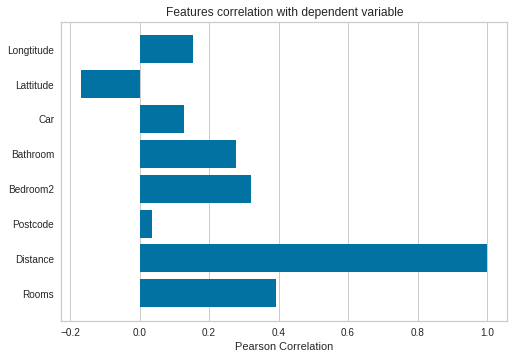

In [150]:
visualizer = FeatureCorrelation(labels=feature_names,
                               method='pearson',
                               )

visualizer.fit(features, target)

visualizer.poof()

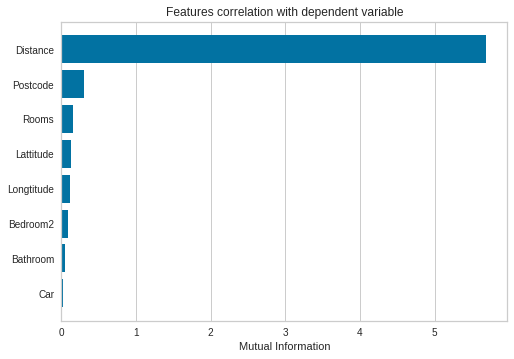

In [152]:
visualizer = FeatureCorrelation(labels=feature_names,
                               method='mutual_info-regression',
                                feature_names=feature_names,
                                sort = True
                               )

visualizer.fit(features, target)

visualizer.poof()